### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### IMPORTING THE DATASET

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\SQL and Excel Files\Excel files\Airbnb_Open_Data.csv')

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10208\159573499.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\USER\Desktop\SQL and Excel Files\Excel files\Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### DATA CLEANING

In [3]:
df.shape

(102599, 26)

In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
### Checking the number of missing values for our columns

msng_values = df.isnull().sum().sort_values().reset_index()

msng_values = msng_values.rename(columns = {'index':'colm', 0:'null_count'})

msng_values

,colm,null_count
0,id,0
1,room type,0
2,host id,0
3,long,8
4,lat,8
5,neighbourhood,16
6,neighbourhood group,29
7,cancellation_policy,76
8,instant_bookable,105
9,country code,131


In [6]:
msng_values['pct'] = round(msng_values['null_count']/df.shape[0]*100, 2)

msng_values.head()

,colm,null_count,pct
0,id,0,0.00
1,room type,0,0.00
2,host id,0,0.00
3,long,8,0.01
4,lat,8,0.01


In [7]:
### Dropping columns with missing values greater than 40% 

msng_col = msng_values[msng_values['pct'] >= 40]['colm'].to_list()

df_col_rmvd = df.drop(labels = msng_col, axis = 1)

df_col_rmvd.shape

(102599, 24)

In [8]:
df_col_rmvd.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [9]:
### Dropping unecessary columns

df_drop_col = df_col_rmvd.drop(columns = ['lat', 'long', 'country code', 'cancellation_policy', 'instant_bookable',
                                 'Construction year', 'service fee', 'reviews per month', 'review rate number'])

In [10]:
df_drop_col.shape

(102599, 15)

### DEALING WITH MISSING VALUES

In [11]:
df_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   country                         102067 non-null  object 
 8   room type                       102599 non-null  object 
 9   price                           102352 non-null  object 
 10  minimum nights                  102190 non-null  float64
 11  number of reviews               102416 non-null  float64
 12  last review     

In [12]:
df_drop_col.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
country                             532
room type                             0
price                               247
minimum nights                      409
number of reviews                   183
last review                       15893
calculated host listings count      319
availability 365                    448
dtype: int64

In [13]:
### Replacing all missing values with their mode value

na_df = ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country',
        'price', 'minimum nights', 'number of reviews', 'last review', 'calculated host listings count', 'availability 365']

for i in na_df:
    df_drop_col[i] = df_drop_col[i].fillna(df_drop_col[i].mode()[0])
    df_drop_col[i]

In [14]:
df_drop_col.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
country                           0
room type                         0
price                             0
minimum nights                    0
number of reviews                 0
last review                       0
calculated host listings count    0
availability 365                  0
dtype: int64

In [45]:
### Checking for any duplicates

df_drop_col[df_drop_col.duplicated()].head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,country,room type,price,minimum nights,number of reviews,last review,calculated host listings count,availability 365
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,United States,Private room,706.0,1.0,1.0,2021-11-14,1.0,339.0
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,United States,Private room,651.0,3.0,38.0,2021-11-13,1.0,0.0
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,United States,Hotel room,907.0,3.0,10.0,2021-11-13,30.0,32.0
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,United States,Private room,589.0,30.0,38.0,2021-11-13,2.0,324.0
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,United States,Entire home/apt,356.0,30.0,13.0,2021-11-13,28.0,336.0


### DATA EXPLORATION AND VISUALISATION

### What is the averange price of Airbnb Listings

In [16]:
### Replacing $ and , with an empty string

df_drop_col['price'] = df_drop_col['price'].str.replace(',|\$', '', regex = True)

### Converting string to float

df_drop_col['price'] = df_drop_col['price'].astype(float)

In [17]:
avg_price = round(df_drop_col['price'].mean(), 2)

print('$',avg_price)

$ 624.28


### What is the most common room type

In [18]:
most_common_room_type = df_drop_col['room type'].mode()

print('Most Common room type',most_common_room_type)

Most Common room type 0    Entire home/apt
Name: room type, dtype: object


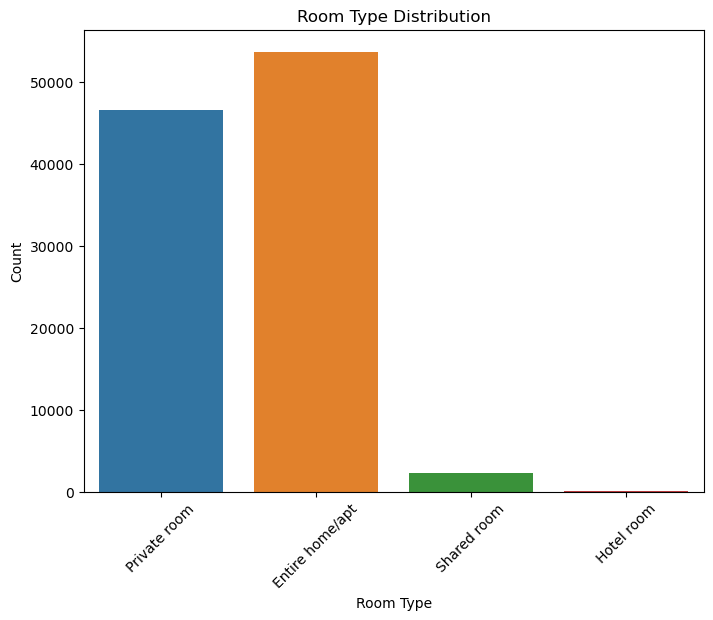

In [19]:
plt.figure(figsize=(8, 6))
sb.countplot(data = df_drop_col, x = 'room type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()

### What are the top neighborhoods by the number of listings

In [20]:
top_neighbourhoods = df_drop_col['neighbourhood'].value_counts().head(10).reset_index()

top_neighbourhoods = top_neighbourhoods.rename(columns = {'neighbourhood':'neighbourhoods', 'count':'frequency'})

top_neighbourhoods

,neighbourhoods,frequency
0,Bedford-Stuyvesant,7953
1,Williamsburg,7775
2,Harlem,5466
3,Bushwick,4982
4,Hell's Kitchen,3965
5,Upper West Side,3860
6,Upper East Side,3680
7,East Village,3492
8,Midtown,3390
9,Crown Heights,3262


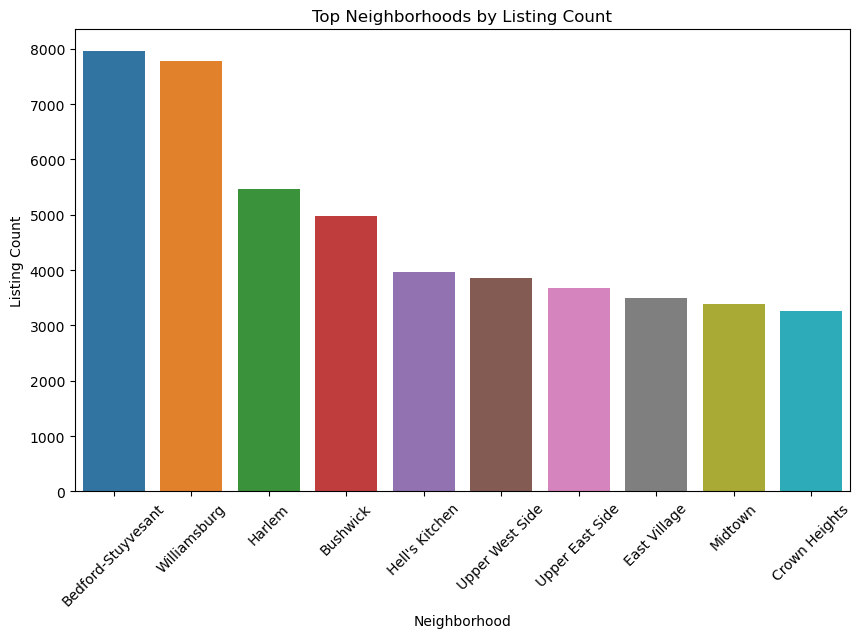

In [22]:
plt.figure(figsize=(10, 6))
sb.barplot(data=top_neighbourhoods, x='neighbourhoods', y='frequency')
plt.xlabel('Neighborhood')
plt.ylabel('Listing Count')
plt.title('Top Neighborhoods by Listing Count')
plt.xticks(rotation=45)
plt.show()

### How has the availability of listings changed over time?

In [23]:
### Converting last review from object to datetime

df_drop_col['last review'] = pd.to_datetime(df_drop_col['last review'])

In [35]:
### Group the data by Year and Month

availability_over_time = df_drop_col.groupby(df_drop_col['last review'].dt.to_period('M'))['availability 365'].mean()

availability_over_time

last review
2012-07     73.500000
2012-08    143.250000
2012-09    169.400000
2012-11    216.750000
2012-12     97.666667
              ...    
2024-08    395.000000
2025-06      0.000000
2026-03     73.000000
2040-06     47.000000
2058-06    230.000000
Freq: M, Name: availability 365, Length: 116, dtype: float64

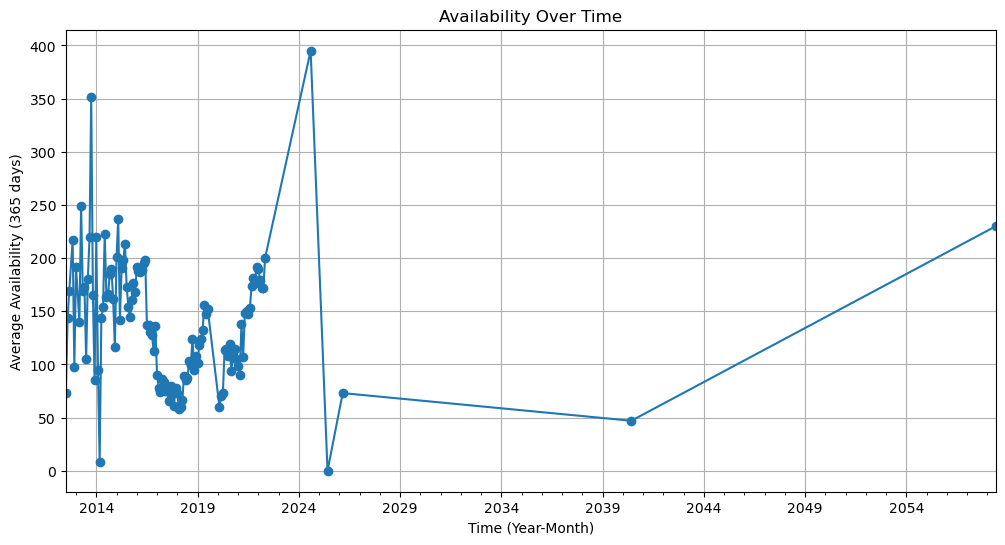

In [36]:
plt.figure(figsize=(12, 6))
availability_over_time.plot(kind='line', marker='o')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Availability (365 days)')
plt.title('Availability Over Time')
plt.grid(True)
plt.show()

### Is there seasonal trends in pricing?

In [38]:
price_over_time = df_drop_col.groupby(df_drop_col['last review'].dt.to_period('Y'))['price'].mean()

price_over_time

last review
2012    469.153846
2013    647.225000
2014    658.032520
2015    618.867129
2016    624.006719
2017    625.738676
2018    625.973112
2019    623.735295
2020    638.823558
2021    614.721513
2022    628.389141
2024    571.000000
2025    539.000000
2026    920.000000
2040    721.000000
2058    842.000000
Freq: A-DEC, Name: price, dtype: float64

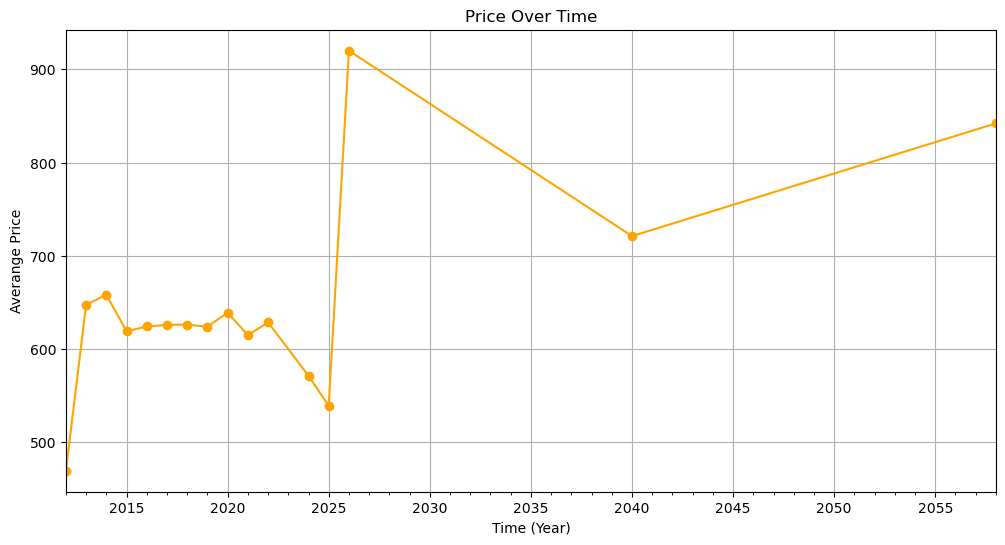

In [42]:
plt.figure(figsize=(12, 6))
price_over_time.plot(kind='line', marker='o', color='orange')
plt.xlabel('Time (Year)')
plt.ylabel('Averange Price')
plt.title('Price Over Time')
plt.grid(True)
plt.show()

### Who are the top 10 hosts with the most listings?

In [43]:
top_hosts = df_drop_col['host name'].value_counts().head(10).reset_index()

top_hosts

,host name,count
0,Michael,1287
1,David,764
2,John,581
3,Alex,546
4,Sonder (NYC),516
5,Daniel,473
6,Karen,439
7,Sarah,434
8,Maria,426
9,Anna,400


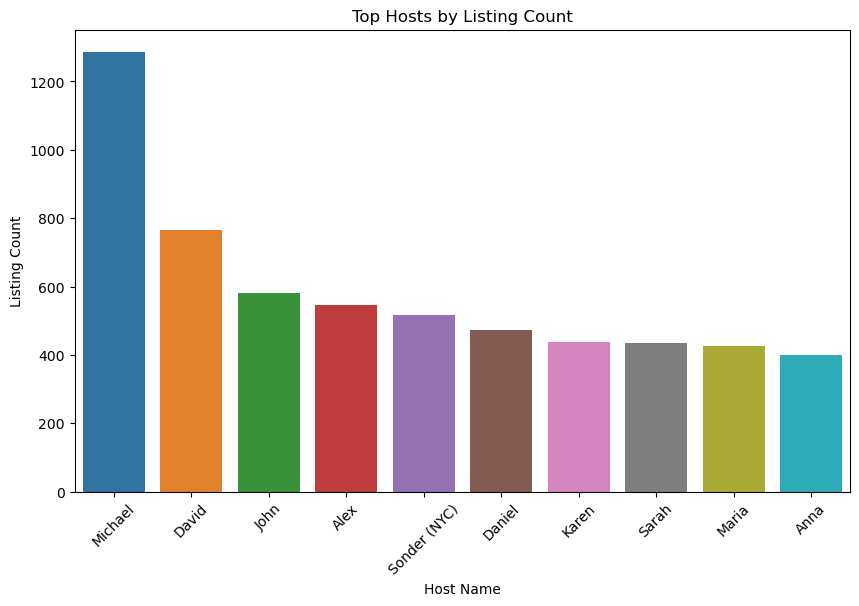

In [44]:
plt.figure(figsize=(10, 6))
sb.barplot(data=top_hosts, x='host name', y='count')
plt.xlabel('Host Name')
plt.ylabel('Listing Count')
plt.title('Top Hosts by Listing Count')
plt.xticks(rotation=45)
plt.show()